In [3]:
#Loading libraries
library(ggplot2)
library(plotly)
library(RColorBrewer)
library(dplyr)
library(maps)
library(ggmap)
library(mapproj)

In [4]:
# Reading in the grouped complete metrics dataset
df = read.csv('/dsa/groups/capstonesp2023/online/Team05/prediction_results_all_copy.csv')

In [5]:
head(df)

X,gamtime_year,model_accuracy,gametime_week,optimal_features,feature_names
<int>,<int>,<dbl>,<int>,<int>,<fct>
0,2015,0.6250000,2,7,"['passing_qbr', 'rushing_first_downs_earned', 'passing_first_downs_earned', 'penalties_committed_yards', 'touchdowns_scored', 'away_fourth_down_attempts', 'away_rush_attempts']"
0,2015,0.6250000,3,2,"['penalties_committed_yards', 'total_yardage']"
0,2015,0.6000000,4,2,"['penalties_committed_yards', 'away_penalties_committed_yards']"
0,2015,0.7142857,5,29,"['passing_completion_percentage', 'penalty_first_downs_earned', 'passing_yards_per_attempt', 'passing_net_yards_per_attempt', 'rushing_first_downs_earned', 'third_down_conversions_percentage', 'fourth_down_attempts', 'penalties_committed_yards', 'total_yardage', 'offensive_plays', 'defensive_plays', 'home_rush_attempts', 'home_avg_return_touchdowns', 'away_pass_comp_pct', 'away_penalty_first_downs_earned', 'away_qbr', 'away_pass_per_attempt', 'away_pass_net_yards_per_attempt', 'away_rush_first_downs_earned', 'away_passing_first_downs_earned', 'away_third_downs_convs_pct', 'away_fourth_down_attempts', 'away_penalties_committed_yards', 'away_total_yardage', 'away_offensive_plays', 'away_defensive_plays', 'away_turnovers', 'away_touchdowns', 'away_avg_return_touchdowns']"
0,2015,0.6428571,6,7,"['rushing_first_downs_earned', 'penalties_committed_yards', 'home_rush_attempts', 'away_qbr', 'away_third_downs_convs_pct', 'away_penalties_committed_yards', 'away_total_yardage']"
0,2015,0.7142857,7,9,"['rushing_first_downs_earned', 'penalties_committed_yards', 'total_yardage', 'home_rush_attempts', 'away_qbr', 'away_passing_first_downs_earned', 'away_third_downs_convs_pct', 'away_penalties_committed_yards', 'away_total_yardage']"


Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.


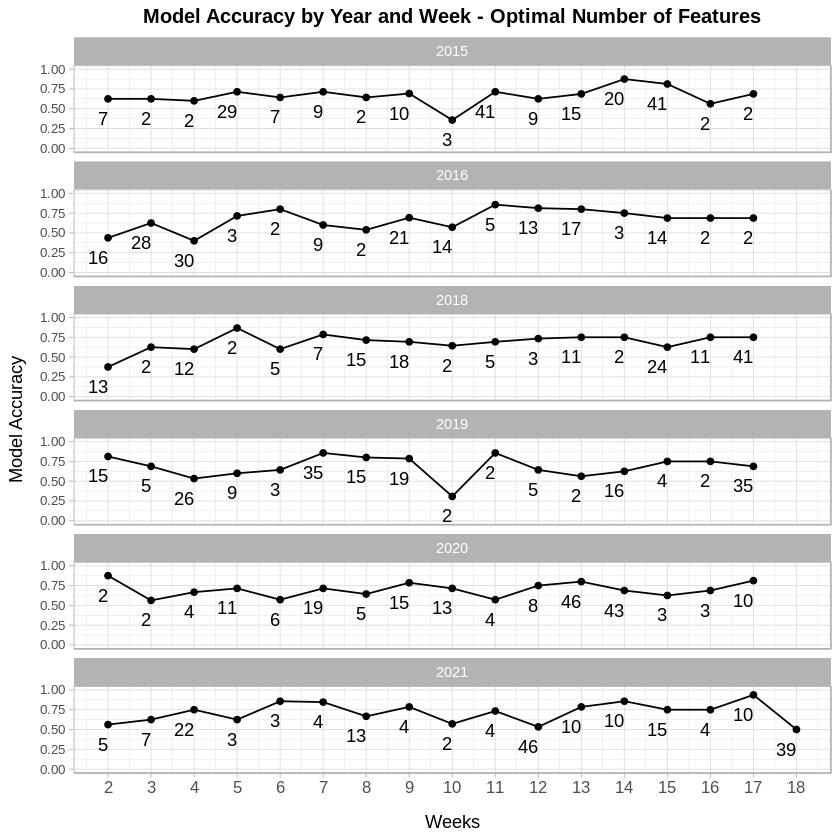

In [6]:

ggplot(df, aes(x = gametime_week, y = model_accuracy, label=optimal_features)) +
  geom_line() + geom_point() + 
  facet_wrap(~gamtime_year, ncol = 1) + geom_text(hjust=1, vjust=2)+
  xlim(1, 18)+ ylim(0, 1) + theme_light() + theme(legend.position="none")+ 
    scale_x_continuous(breaks=seq(0, 18, 1)) +xlab("Weeks") +
    ylab("Model Accuracy") +
    theme(axis.text.x = element_text(size = 10), axis.text.y = element_text(size = 8,hjust = 5)) + 
    theme(axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0))) +
    theme(axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0))) +
    ggtitle("Model Accuracy by Year and Week - Optimal Number of Features") +
    theme(plot.title=element_text(family='', face='bold', colour='Black', size=12, hjust=.5, vjust=1)) 

In [7]:
# Reading in the grouped complete metrics dataset
df = read.csv('/dsa/groups/capstonesp2023/online/Team05/prediction_probabilities.csv')

In [8]:
data_2022 <- df 
#%>% filter(gametime_year == 2022)

In [9]:
data_2022$model_accuracy <-0.01*(data_2022$model_accuracy)

In [10]:
data_2022 <- data_2022 %>%                   # Using dplyr functions
  mutate_if(is.numeric,
            round,
            digits = 2)
data_2022

X,team_name,opponent_name,gametime_year,gametime_week,win_or_loss,Prediction,home_line_open,spread_actual,model_accuracy,Predicted_Loss_Prob,Predicted_Win_Prob
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1840,Cleveland Browns,Pittsburgh Steelers,2022,3,W,W,-3.0,-12,0.50,2.9,97.1
1841,Seattle Seahawks,Atlanta Falcons,2022,3,L,W,-3.0,4,0.50,3.9,96.1
1842,New England Patriots,Baltimore Ravens,2022,3,L,W,3.0,11,0.50,10.2,89.8
1843,Miami Dolphins,Buffalo Bills,2022,3,W,W,4.5,-2,0.50,0.0,100.0
1844,New York Jets,Cincinnati Bengals,2022,3,L,W,6.0,15,0.50,8.6,91.4
1845,Minnesota Vikings,Detroit Lions,2022,3,W,W,-7.5,-4,0.50,45.1,54.9
1846,Tampa Bay Buccaneers,Green Bay Packers,2022,3,L,L,-3.0,2,0.50,90.6,9.4
1847,Chicago Bears,Houston Texans,2022,3,W,W,-3.0,-3,0.50,15.6,84.4
1848,Los Angeles Chargers,Jacksonville Jaguars,2022,3,L,W,-9.0,28,0.50,38.0,62.0


Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.


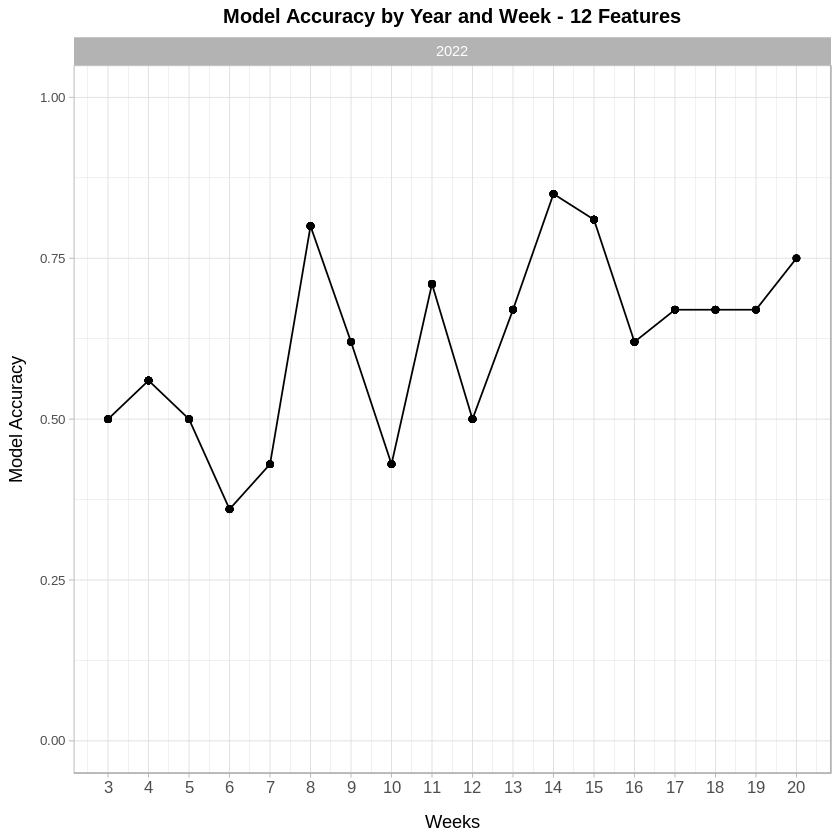

In [11]:
ggplot(data_2022, aes(x = gametime_week, y = model_accuracy)) +
  geom_line() + geom_point() + 
  facet_wrap(~gametime_year, ncol = 1) + 
  xlim(1, 18)+ ylim(0, 1) + theme_light() + theme(legend.position="none")+ 
    scale_x_continuous(breaks=seq(0, 20, 1)) +xlab("Weeks") +
    ylab("Model Accuracy") +
    theme(axis.text.x = element_text(size = 10), axis.text.y = element_text(size = 8,hjust = 5)) + 
    theme(axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0))) +
    theme(axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0))) +
    ggtitle("Model Accuracy by Year and Week - 12 Features") +
    theme(plot.title=element_text(family='', face='bold', colour='Black', size=12, hjust=.5, vjust=1)) 

In [12]:
# Reading in the grouped complete metrics dataset
df2 = read.csv('/dsa/groups/capstonesp2023/online/Team05/WL_Spread_Combined.csv')

In [13]:
df2

team_name,gametime_year,win_or_loss,Prediction,home_line_open,spread_actual,model_accuracy,Predicted_Loss_Prob,Predicted_Win_Prob,game_key,⋯,Recall,Season,Var_Smoothing,Week,k_best,Home_Team_Lose_Spread_probability,Home_Team_Beat_Spread_probability,win_pred_success,spread_pred_success,both_success
<fct>,<int>,<fct>,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>,⋯,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
Cleveland Browns,2022,W,W,-3.0,-12,50.00,2.9,97.1,Pittsburgh Steelers-Cleveland Browns-3,⋯,0.73,2022,0.00268,3,12,78.6,21.4,1,0,1
Seattle Seahawks,2022,L,W,-3.0,4,50.00,3.9,96.1,Atlanta Falcons-Seattle Seahawks-3,⋯,0.73,2022,0.00268,3,12,80.6,19.4,0,1,1
New England Patriots,2022,L,W,3.0,11,50.00,10.2,89.8,Baltimore Ravens-New England Patriots-3,⋯,0.73,2022,0.00268,3,12,81.3,18.7,0,1,1
Miami Dolphins,2022,W,W,4.5,-2,50.00,0.0,100.0,Buffalo Bills-Miami Dolphins-3,⋯,0.73,2022,0.00268,3,12,19.5,80.5,1,1,2
New York Jets,2022,L,W,6.0,15,50.00,8.6,91.4,Cincinnati Bengals-New York Jets-3,⋯,0.73,2022,0.00268,3,12,37.4,62.6,0,0,0
Minnesota Vikings,2022,W,W,-7.5,-4,50.00,45.1,54.9,Detroit Lions-Minnesota Vikings-3,⋯,0.73,2022,0.00268,3,12,64.0,36.0,1,1,2
Tampa Bay Buccaneers,2022,L,L,-3.0,2,50.00,90.6,9.4,Green Bay Packers-Tampa Bay Buccaneers-3,⋯,0.73,2022,0.00268,3,12,80.7,19.3,1,1,2
Chicago Bears,2022,W,W,-3.0,-3,50.00,15.6,84.4,Houston Texans-Chicago Bears-3,⋯,0.73,2022,0.00268,3,12,92.1,7.9,1,1,2
Los Angeles Chargers,2022,L,W,-9.0,28,50.00,38.0,62.0,Jacksonville Jaguars-Los Angeles Chargers-3,⋯,0.73,2022,0.00268,3,12,92.4,7.6,0,1,1


In [14]:
colnames(df2) 

[1] "team_name"                         "gametime_year"                    
 [3] "win_or_loss"                       "Prediction"                       
 [5] "home_line_open"                    "spread_actual"                    
 [7] "model_accuracy"                    "Predicted_Loss_Prob"              
 [9] "Predicted_Win_Prob"                "game_key"                         
[11] "Accuracy"                          "Away_Team"                        
[13] "F1_Score"                          "Home_Team"                        
[15] "Home_Team_Lost_Spread"             "Model_Probability"                
[17] "Precision"                         "Prediction_Class"                 
[19] "Recall"                            "Season"                           
[21] "Var_Smoothing"                     "Week"                             
[23] "k_best"                            "Home_Team_Lose_Spread_probability"
[25] "Home_Team_Beat_Spread_probability" "win_pred_success"                 
[27] "spread_pred_success"               "both_success"

In [15]:
data_reduced <- df2 %>% filter(both_success == 1)

In [16]:
table(data_reduced$Week) 


 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 
 5  4  5  5  6  4  7  2  7  7  7  3  6  9  8  7  2  1 

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

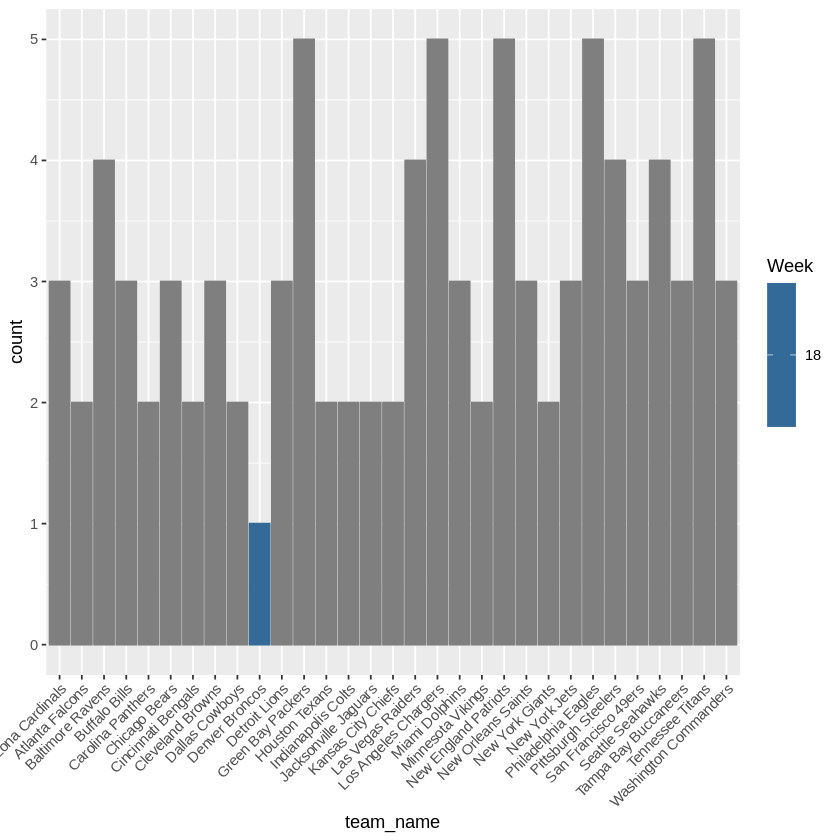

In [17]:
ggplot(data_reduced, aes(x=team_name, fill=Week, color=Week)) + 
 geom_histogram(position = 'identity', stat="count") + theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))

In [18]:
#LOSSES

Predicted_loss <- df2 %>% filter(Prediction == 'L') %>% filter(Predicted_Loss_Prob > 80.0)

In [19]:
#WINS

Predicted_win <- df2 %>% filter(Prediction == 'W') %>% filter(Predicted_Win_Prob > 90.0) 

In [20]:
games_predicted <- Predicted_win %>% group_by(Week) %>% summarise(games_predicted=n())
games_predicted 

Week,games_predicted
<int>,<int>
3,8
5,2
7,1
8,1
10,2
11,2
12,2
14,5
15,3


In [21]:
loss_games_predicted <- Predicted_loss %>% group_by(Week) %>% summarise(games_predicted=n())
loss_games_predicted 

Week,games_predicted
<int>,<int>
3,4
4,13
5,2
6,5
7,4
8,3
9,2
10,2
11,5


In [22]:
win_predictions <- Predicted_win %>% group_by(Week, Prediction, win_pred_success) %>% summarise(predicted_correctly=n()) 
win_predictions2 <- merge(win_predictions,games_predicted ,by="Week")

In [23]:
# Probability at 70% = 72 games predicted at 71% percent correct
# Probability at 80% = 61 games predicted at 78% percent correct
# Probability at 90% = 47 games predicted at 80% percent correct
# Probability at 95% = 37 games predicted at 86% percent correct

win_predictions2 <- win_predictions2 %>% filter(win_pred_success == 1) %>% mutate(percent_correct = predicted_correctly / games_predicted) %>% 
mutate_if(is.numeric,round,digits = 2)

win_predictions2$percent_correct <-100*(win_predictions2$percent_correct)

win_predictions2

Week,Prediction,win_pred_success,predicted_correctly,games_predicted,percent_correct
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
3,W,1,4,8,50
5,W,1,1,2,50
8,W,1,1,1,100
10,W,1,1,2,50
11,W,1,2,2,100
12,W,1,2,2,100
14,W,1,4,5,80
15,W,1,3,3,100
16,W,1,5,5,100


In [24]:
loss_predictions <- Predicted_loss %>% group_by(Week, Prediction, win_pred_success) %>% summarise(predicted_correctly=n()) 
loss_predictions2 <- merge(loss_predictions,loss_games_predicted ,by="Week")

In [25]:
# Probability at 80% = 60 games at 60% percent correct
# Probability at 90% = 35 games at 70% percent correct
# Probability at 95% = 20 games at 82% percent correct


loss_predictions2 <- loss_predictions2 %>% filter(win_pred_success == 1) %>% mutate(percent_correct = predicted_correctly / games_predicted) %>% 
mutate_if(is.numeric,round,digits = 2)

loss_predictions2$percent_correct <-100*(loss_predictions2$percent_correct)

loss_predictions2

Week,Prediction,win_pred_success,predicted_correctly,games_predicted,percent_correct
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
3,L,1,2,4,50
4,L,1,6,13,46
5,L,1,2,2,100
6,L,1,1,5,20
7,L,1,1,4,25
8,L,1,2,3,67
9,L,1,1,2,50
10,L,1,1,2,50
11,L,1,5,5,100
